<a href="https://colab.research.google.com/github/apuleyo3/Graph-routing-using-dijkstra-shortest-path-algorithm-and-google-maps/blob/master/trace_covid_mx_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relating low education and poverty, with an increase in COVID-19 contagion in Mexico and Mexico City
#### IBM Capstone project | Victor Javier Martinez Hernandez

## Table of contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#met">Methodology</a></li>
    <li><a href="#data">Data</a></li>
    <li><a href="#fexp">First nationwide exploration</a></li>
    <li><a href="#vars">Looking for variables to work with</a></li>
    <li><a href="#sexp">Applying the model to Mexico City</a></li>
    <li><a href="#clusters">Final clusters</a></li>
    <li><a href="#final">Final word (Results, Discussion and Conclusion)</a></li>
</ul>

## Introduction <a name="intro"></a>

Some recent evidence seems to point out that people with low education levels and, in some cases, living in poverty are more likely to catch COVID-19 in Mexico. Up to now, some universities have linked these two factors with defunctions, but they have not related this relationship, between poverty and low scholarity among active COVID-19 patients. I will explore the possible relationship between these variables and trace high COVID-19 contagion per capita, first in Mexico as a first exploration, and then in Mexico City as a final trial run. 

Mexico is one of the countries that hasn't done enough testing  for COVID-19. The strategy is to detect cases when the patient arrives at the hospital and shows symptoms, but health authorities have scarcely tested people randomly, and their best hope is that an app they've done to people to report that doesn't feel fine, can help them to trace contagion among the city population. 
 
Is this a business problem? Of course it is, COVID has hitted hard mexican economy, and people are looking for ways to recover their jobs and business. The strategy for reopening activities around Mexico City is simple: the needs of the economy come in first place over public health. Therefore, no scientific study has been presented by the city authorities addressing the best time to reopen commercial and office activities, nor which areas should be allowed to go back to normal operations.
 
Giving business a map of districts that are in danger of reopening so soon, could give owners and workers an informed alternative to take decisions on their future actions.

## Methodology <a name="met"></a>

First, I will explore the 32 federal entities of the Mexican United States, the official name of our country, or called by their common name, the States of the Mexican Republic. Therefore, the data I am using is official mexican government data on contagion, education, population and tourist information from the country, and in the first trial, of Mexico City.

To define our main variables, when talking about low education, we are talking about people that have less than 10.5 years of formal education, what does this mean in Mexico? Well, this is a person that has ended primary and secondary schools, and has 1.5 years of college, the mean education years in Mexico is 9.1 and in Mexico City is 11.2, but some States and some Districts in the case of Mexico City are below this line.

The poverty index is an index from 0 to 100, that states a numerical value of the level of marginalization or exclusion this region, district or state has, from basic needs and services, it is stored in the column 'Poverty Index' on our data set on the 'IND0A100' column on the CONAPO dataset.

The column 'Uneducated_pct' is the actual percentage of adults of a given population that have no education or can't read or write, in the CONAPO dataset is stored as 'Sin escolaridad' column.

The visitors dataset is just being used as an example of the movement of people in a non-pandemic year, I have not updated or trusted source to consult and bring a more accurate result, saying this, 'Visitors' column is just for giving a viewpoint on how tourist used to enter and move into the country. 

'Pct' column is the operation from dividing the COVID total patients from the actual population.

## Data <a name="data"></a>

Thinking of the data I need for my project, I looked for official sources and then some alternative to give me some glance about the problem, after a broad search, I found the information I needed for my research.

*   Open data by the mexican of COVID patients profile government: [SINAVE](https://datos.cdmx.gob.mx/explore/dataset/base-covid-sinave/information/)


> This dataset is from the Healthcare Public service, it's updated daily


*   Census estimates for population: [INEGI](https://www.inegi.org.mx/programas/intercensal/2015/)


> Mexican government make the country census every 10 years, the last one was made on 2010, on 2015 some estimates were made based on a survey. On 2020, this year, mexican government is actually doing the census, but the information it's not going to be ready until 2021, so I decided to use the 2015 estimate. 


*   Poverty index by mexican government: [CONAPO](http://www.conapo.gob.mx/es/CONAPO/Datos_Abiertos_del_Indice_de_Marginacion)


> This dataset is made with the information from a national project for measuring poverty in Mexico, the repository is from 2015.


*   Tourist by state mexican government: [SECTUR](http://www.datatur.sectur.gob.mx/SitePages/InfTurxEdo.aspx)


> This is the Tourism board system, the information si updated on a monthly basis, however all metrics of this year are disrupted, and maybe are not good enough for a formal exploration, I used some alternatives just to give some insights about the most common ways on how people used to travel around Mexico. 


*   FOURSQUARE API for listing business



In [1]:
import pandas as pd
import numpy as np
!pip install folium
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from geopy.geocoders import Nominatim
from sklearn import preprocessing
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


!wget https://twk.com.mx/COVID-Pobreza%20IBM/mexicoHigh.json

communities_geo = r'mexicoHigh.json'

# open the json file - json.load() methods returns a python dictionary
with open(communities_geo) as communities_file:
    communities_json = json.load(communities_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(communities_json['features'])):
    denominations_json.append(communities_json['features'][index]['properties']['name'])


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


--2020-07-26 07:20:13--  https://twk.com.mx/COVID-Pobreza%20IBM/mexicoHigh.json
Resolving twk.com.mx (twk.com.mx)... 161.35.230.8
Connecting to twk.com.mx (twk.com.mx)|161.35.230.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184555 (180K) [application/json]
Saving to: ‘mexicoHigh.json’

mexicoHigh.json     100%[===================>] 180.23K  --.-KB/s    in 0.07s   

2020-07-26 07:20:14 (2.38 MB/s) - ‘mexicoHigh.json’ saved [184555/184555]



In [2]:
covid_mx = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/casos-asociados-a-covid-19.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# First nationwide exploration <a name="fexp"></a>

My first approach to the COVID-19 is doing the exploration nationwide, in the first place to find out the variables that are correlated with COVID-19 infection rate, and second to see if there are some other factors like population, international and domestic visitors, scholarship and poverty index.

### COVID-19 cases by state

This is the official record of covid patients by State, district, municipality, gender, symptoms and even if the patient had some pre existing conditions like obesity, Diabetes, EPOC, Asthma, among many others. This dataset from the SINAVE (National System of Epidemiological Surveillance), is the government record of the suspected and confirmed COVID-19 cases that were admitted to a hospital.

In [3]:
covid_mx.head(3)

FECHA ACTUALIZACION ID_REGISTRO  ...             positivo pendiente
0          2020-07-15      02eaff  ...  Positivo SARS-CoV-2       NaN
1          2020-07-15      0bc512  ...  Positivo SARS-CoV-2       NaN
2          2020-07-15      0338ef  ...  Positivo SARS-CoV-2       NaN

[3 rows x 40 columns]

In [4]:
mx_conteo = covid_mx['ENTIDAD RESIDENCIA'].value_counts()
mx_conteo = mx_conteo.sort_index(ascending=True)
poblacion = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/01_poblacion_intercensal.csv', header=None)
pb_df = poblacion[(poblacion[1] == 'Total') & (poblacion[2] == 'Total') & (poblacion[3] == 'Valor')].reset_index(drop=True)
pb_df = pb_df[[0,4]]
pb_df = pb_df[1:33]
pb_df[4] = pb_df[4].apply(lambda x: x.replace(",", ""))
pb_df.head(5)

0        4
1        01 Aguascalientes  1312544
2       02 Baja California  3315766
3   03 Baja California Sur   712029
4              04 Campeche   899931
5  05 Coahuila de Zaragoza  2954915

After using a value_counts function to group by State confirmed and suspected cases, I looked for a dataset with the total population of those states. This dataset is from INEGI (National Institute of Statistics and Geography), this institute was founded in 1983 to collect data of the mexican government and the mexican population, and has been since then, our national source of statistical information. 

In [5]:
poblacion = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/01_poblacion_intercensal.csv', header=None)
pb_df = poblacion[(poblacion[1] == 'Total') & (poblacion[2] == 'Total') & (poblacion[3] == 'Valor')].reset_index(drop=True)
pb_df = pb_df[[0,4]]
pb_df = pb_df[1:33]
pb_df[4] = pb_df[4].apply(lambda x: x.replace(",", ""))
pb_df.head()

0        4
1        01 Aguascalientes  1312544
2       02 Baja California  3315766
3   03 Baja California Sur   712029
4              04 Campeche   899931
5  05 Coahuila de Zaragoza  2954915

I decided to merge all information that is meaningful for my research, in a dataset called 'df_final', then integrated the total of COVID infected patients on the column 'COVID-19', and the total population in the 'Population' column. After the merge I did an operation to get the percentage of the population infected by COVID by each state. 

In [6]:
df_final =  pd.DataFrame()
df_final['State'] = list(mx_conteo.index)
denominations_json = sorted(denominations_json) 
df_final['State'] = denominations_json
df_final.sort_values(by='State', inplace=True)
df_final['COVID'] = list(mx_conteo)

# The names need some cleaning because they were not in alphabetical order

pb_df[0] = pb_df[0].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
pb_df.sort_values(by=0, ascending=True, inplace=True)
df_final['Population'] = df_final['COVID']
for i,v in enumerate(pb_df[4]):
    df_final['Population'][i] = v
population = list(pb_df[4])
df_final['Population'] = df_final['Population'].astype(int)

# Creating a new column named Pct, that contains the percent of the total population with COVID-19

df_final['Pct'] = (df_final['COVID']/df_final['Population'])*100
df_final.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


State  COVID  Population       Pct
0       Aguascalientes   9927     1312544  0.756318
1      Baja California  19158     3315766  0.577785
2  Baja California Sur   7509      712029  1.054592
3             Campeche   6138      899931  0.682052
4              Chiapas   8274     5217908  0.158569

### By population

These plots present side by side the totals of the SINAVE nationwide dataset, and the percentage of the population infected based on its population, as you can see Mexico City is the first place in infections per capita, but it's not the most populated state in the country. However 'México' State, that is in the first place, is surrounding Mexico City on almost every side and is where most of the people that work and move through the city come from. It was a surprise that, even though it has twice the population of Mexico City, it has not been as hitted in infection rate. 

In [7]:
locator = Nominatim(user_agent="apuleyo3")
location = locator.geocode("Mexico City, Mexico")

gen = folium.Figure(width=1060, height=300)
mexmap = folium.Map(location=[location.latitude, location.longitude], zoom_start=7, tiles='openstreetmap').add_to(gen)
mexmap.choropleth(
    geo_data=communities_geo,
    data=df_final,
    columns=['State', 'Population'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=1,
    legend_name='Total Population by State',
    smooth_factor=0)
gen

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


This first exploration was made to see if COVID cases can be explained based on population, and it explains the total number of them, the most populated countries have more cases, but when compared with their population the story seems to be different. 

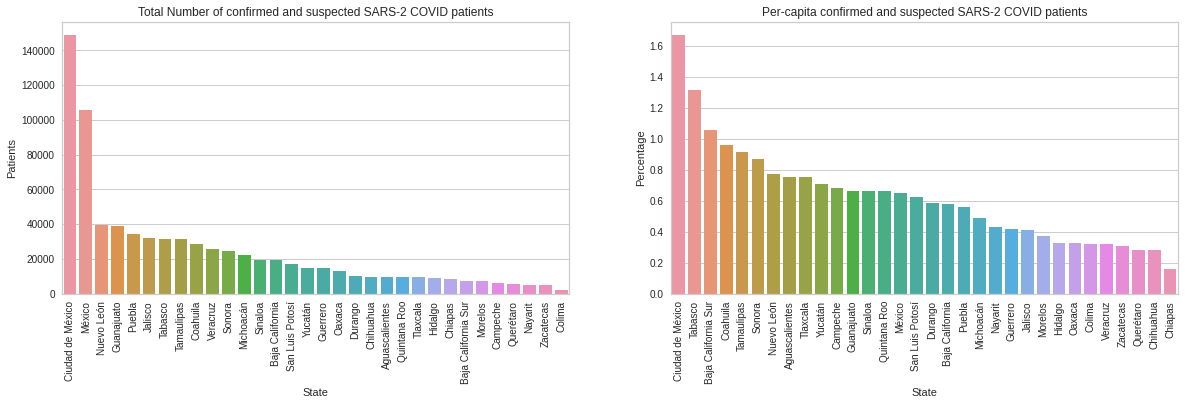

In [8]:
# Sorting the values for presenting the data in descending order

sorted_covid = df_final.sort_values(by='COVID', ascending=False)
sorted_pct = df_final.sort_values(by='Pct', ascending=False)
sorted_pop = df_final.sort_values(by='Population', ascending=False)

fig, axs = plt.subplots(ncols=2, figsize=(20,5))
pct = sns.barplot(x='State', y='COVID', data=sorted_covid, ax = axs[0])
pct1 = sns.barplot(x='State', y='Pct', data=sorted_pct, ax = axs[1])
pct.set(xlabel='State', ylabel='Patients', title='Total Number of confirmed and suspected SARS-2 COVID patients')
pct1.set(xlabel='State', ylabel='Percentage', title='Per-capita confirmed and suspected SARS-2 COVID patients')

for p1,p2 in zip(pct.get_xticklabels(), pct1.get_xticklabels()):
    p1.set_rotation(90)
    p2.set_rotation(90)

The chart on the right that presents total COVID patients is similar to the total population by state, the second one has an interesting aspect, both Tabasco and Baja California Sur are not populated states, in the case of Baja California sur is almost the least populated of the entire country. It seems that population is not entirely related to the rate of contagion, but it can explain some of it. 

The next plot compares the total population by State, and the alpha layer contains the per-capita information, this reveals the states that are doing a poor job on containing the advance of the pandemic.

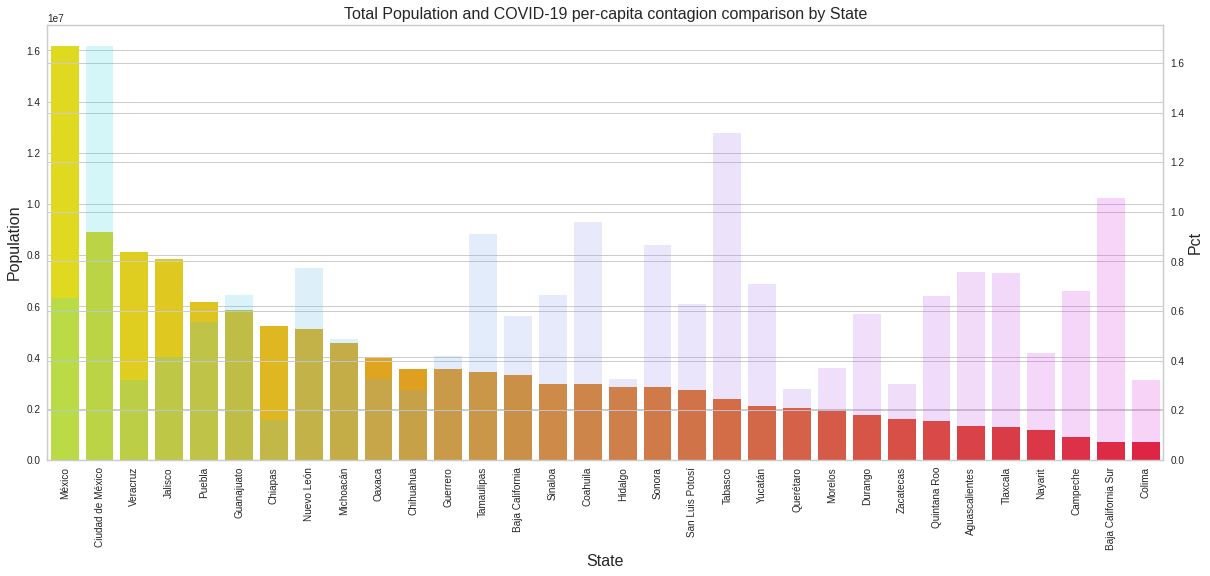

In [9]:
#Create combo chart

fig, ax1 = plt.subplots(figsize=(20,8))
color = 'tab:green'

#bar plot creation

ax1.set_title('Total Population and COVID-19 per-capita contagion comparison by State', fontsize=16)
ax1.set_xlabel('State', fontsize=16)
ax1.set_ylabel('Millions of people', fontsize=16)
ax1 = sns.barplot(x='State', y='Population', data = sorted_pop, palette='autumn_r', alpha=1)
ax1.tick_params(axis='y')

#specify we want to share the same x-axis

ax2 = ax1.twinx()
color = 'tab:blue'

#line plot creation

ax2.set_ylabel('Total Population', fontsize=16)
ax2 = sns.barplot(x='State', y='Pct', data = sorted_pop, palette='cool', alpha=0.2)
ax2.tick_params(axis='y', color=color)
#show plot

for p1,p2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
    p1.set_rotation(90)
    p2.set_rotation(90)

plt.show()

### By domestic and international visitors

At first, mexican authorities (and other governments around the world), suspected that tourists and travelers were the main problem on the COVID-19 spread, this was true on the beginning of the pandemic in Mexico, but after the lockdown on March 23, movement was contained, activities, offices, industry and the tourism industry was closed. Even so, the way COVID spread it's not clearly explained by visitors. 

Cancún (Quintana Roo) and Mexico City, are by far the most visited cities in the country, as you can see in this top five from 2014, that sadly is the most complete dataset available, the information of 2015 to 2019 is partial or incomplete, however the trend remains the same. 

In [10]:
url = 'https://www.entornoturistico.com/cuantos-turistas-nacionales-y-extranjeros-recibe-cada-estado-de-la-republica-mexicana/'

html_page_text = requests.get(url,headers={'User-agent': 'Mozilla/5.0'}).text
visitors = pd.read_html(html_page_text)
visitors = visitors[0]
visitors = visitors[[1,2,3,4]]
tur_df = visitors[1:33]
tur_df.columns = ['Estado', 'Nacionales', 'Extrajeros', 'Total']
tur_df = tur_df.sort_values(by='Estado').reset_index(drop=True)
df_final['Visitors'] = tur_df['Total'].astype(int)
df_final[['State', 'Visitors']].sort_values(by='Visitors', ascending=False).head(5)

State  Visitors
22      Quintana Roo  12257870
6   Ciudad de México  11019773
14         Michoacán   7235525
29          Veracruz   5699743
12           Hidalgo   5683881

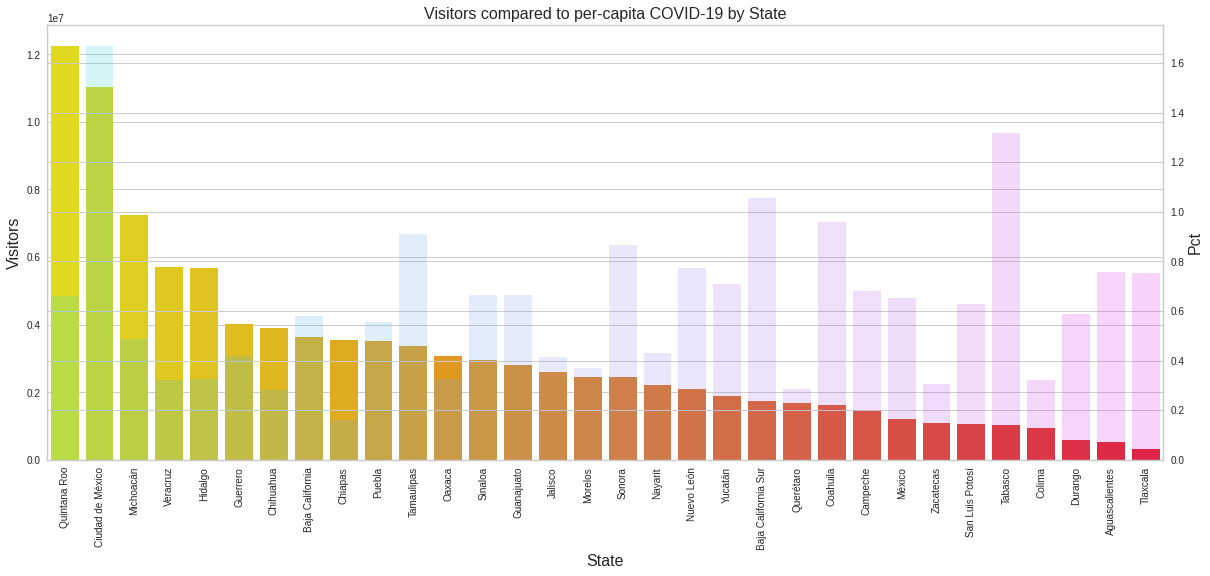

In [11]:
sorted_visit = df_final.sort_values(by='Visitors', ascending=False)

fig, ax1 = plt.subplots(figsize=(20,8))
color = 'tab:green'

ax1.set_title('Visitors compared to per-capita COVID-19 by State', fontsize=16)
ax1.set_xlabel('State', fontsize=16)
ax1.set_ylabel('Millions of people', fontsize=16)
ax1 = sns.barplot(x='State', y='Visitors', data = sorted_visit, palette='autumn_r', alpha=1)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:blue'


ax2.set_ylabel('Visitors', fontsize=16)
ax2 = sns.barplot(x='State', y='Pct', data = sorted_visit, palette='cool', alpha=0.2)
ax2.tick_params(axis='y', color=color)

for p1,p2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
    p1.set_rotation(90)
    p2.set_rotation(90)

plt.show() 

## Poverty, uneducated adults and low education

In the last weeks it has been pointed out by some mexican <a href="https://www.forbes.com.mx/noticias-sin-empleo-baja-escolaridad-mayoria-muertes-covid-19-mexico/">universities</a> and other NGO, that 7 of 10 deceased COVID cases were from the poorest people in Mexico, this is why this variables are taken in this exploratory analysis to find out if it's related somehow to the COVID spread, or is just relevant on those who are dying. 

In [12]:
poverty = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/Base_Indice_de_marginacion_estatal_90-15.csv', engine='python', encoding='ISO-8859-1')
poverty_idx = poverty[poverty['AÑO'] == 2010]
poverty_idx = poverty_idx.reset_index()
poverty_idx = poverty_idx[['NOM_ENT', 'IND0A100']]
poverty_idx['NOM_ENT'][8] = 'Ciudad de México'
poverty_idx.sort_values(by='NOM_ENT', inplace=True)
poverty_idx = poverty_idx.drop(32)
poverty_idx['IND0A100'] = poverty_idx['IND0A100'].astype(float)
poverty_idx = poverty_idx.sort_values(by='NOM_ENT')
poverty_idx.reset_index(drop=True, inplace=True)
df_final['Poverty Index'] = poverty_idx['IND0A100']
df_final.sort_values(by='Poverty Index', ascending=False).head(5)

State  COVID  Population       Pct  Visitors  Poverty Index
11  Guerrero  14779     3533251  0.418283   4033289          88.72
4    Chiapas   8274     5217908  0.158569   3542911          84.14
19    Oaxaca  12939     3967889  0.326093   3083266          80.48
29  Veracruz  26026     8112505  0.320813   5699743          57.63
20    Puebla  34368     6168883  0.557119   3508823          49.88

Seeing poverty index against COVID per-capita chart, it didn't seem to raise any eye

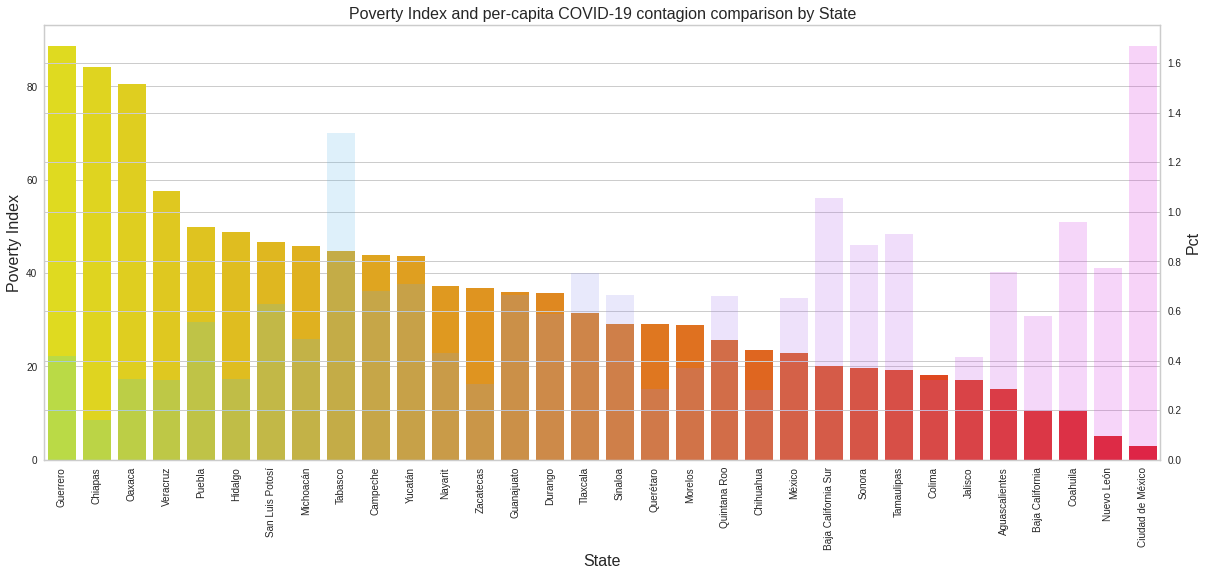

In [13]:
sorted_pov = df_final.sort_values(by='Poverty Index', ascending=False)


fig, ax1 = plt.subplots(figsize=(20,8))
color = 'tab:green'

ax1.set_title('Poverty Index and per-capita COVID-19 contagion comparison by State', fontsize=16)
ax1.set_xlabel('State', fontsize=16)
ax1.set_ylabel('Millions of people', fontsize=16)
ax1 = sns.barplot(x='State', y='Poverty Index', data = sorted_pov, palette='autumn_r', alpha=1)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:blue'


ax2.set_ylabel('Visitors', fontsize=16)
ax2 = sns.barplot(x='State', y='Pct', data = sorted_pov, palette='cool', alpha=0.2)
ax2.tick_params(axis='y', color=color)

for p1,p2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
    p1.set_rotation(90)
    p2.set_rotation(90)

plt.show() 

When seeing this chart, it seems that poverty index has a negative correlation, or I thought so at first, but in the case of the first four States they are mountainous regions that have problems in almost any area, it could be the way information is collected and that it's not possible to have test for COVID on those regions.

### Education years and uneducated population 

Unsurprisingly, these three states Chiapas, Oaxaca and Guerrero are the states with less educational years per-capita and with the more uneducated people, as far as we know now they haven't been hitted hard, or so the authorities of those States say.

In [14]:
education = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/06_educacion.csv', header=None)
education = education[(education[1] == 'Total') & (education[3] == 'Valor') & (education[2] == 'Total')]
education = education[[0, 5, 16]].reset_index(drop=True)
education[0] = education[0].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
education = education.sort_values(by=0).reset_index(drop=True)
df_final['Uneducated_pct'] = education[5]
df_final['Education years'] = education[16]
df_final.sort_values(by='Education years', ascending=True).head(3)

State  COVID  Population  ...  Poverty Index  Uneducated_pct  Education years
4    Chiapas   8274     5217908  ...          84.14           14.55             7.29
19    Oaxaca  12939     3967889  ...          80.48           11.84             7.52
11  Guerrero  14779     3533251  ...          88.72           13.25             7.80

[3 rows x 8 columns]

On the other side of the outliers that have high Education years, high 
scholarship and low Poverty index have a lot of contagion per capita, this is the case of Mexico City and Nuevo Leon States

In [15]:
df_final.sort_values(by='Education years', ascending=False).head(3)

State   COVID  ...  Uneducated_pct  Education years
6   Ciudad de México  148907  ...            2.02            11.12
18        Nuevo León   39557  ...            2.15            10.27
25            Sonora   24702  ...            2.72            10.00

[3 rows x 8 columns]

# Looking for the variables to work with <a name="vars"></a>

In [16]:
df_final

State   COVID  ...  Uneducated_pct  Education years
0        Aguascalientes    9927  ...            3.08             9.73
1       Baja California   19158  ...            2.96             9.76
2   Baja California Sur    7509  ...            3.26             9.91
3              Campeche    6138  ...            7.59             9.14
4               Chiapas    8274  ...           14.55             7.29
5             Chihuahua    9941  ...            3.58             9.47
6      Ciudad de México  148907  ...            2.02            11.12
7              Coahuila   28378  ...            2.51             9.90
8                Colima    2293  ...            4.67             9.53
9               Durango   10308  ...            3.36             9.15
10           Guanajuato   38880  ...            7.75             8.38
11             Guerrero   14779  ...           13.25             7.80
12              Hidalgo    9340  ...            6.72             8.72
13              Jalisco   32358  ...            4.35             9.25
14            Michoacán   22313  ...            9.14             7.93
15              Morelos    7078  ...            5.83             9.30
16               México  105597  ...            4.00             9.53
17              Nayarit    5071  ...            5.55             9.16
18           Nuevo León   39557  ...            2.15            10.27
19               Oaxaca   12939  ...           11.84             7.52
20               Puebla   34368  ...            7.92             8.49
21            Querétaro    5790  ...            5.63             9.55
22         Quintana Roo    9922  ...            4.49             9.62
23      San Luis Potosí   17053  ...            6.49             8.82
24              Sinaloa   19668  ...            4.71             9.58
25               Sonora   24702  ...            2.72            10.00
26              Tabasco   31551  ...            4.84             9.31
27           Tamaulipas   31370  ...            3.72             9.51
28             Tlaxcala    9590  ...            4.13             9.27
29             Veracruz   26026  ...            9.21             8.20
30              Yucatán   14835  ...            6.67             8.82
31            Zacatecas    4837  ...            4.92             8.63

[32 rows x 8 columns]

After getting all this data from mexican government sources, mainly because there are no other sources for some states, and the official and available information that we have, that's not the case with Mexico City, that is our final target.

Looking to this thermal correlation map, some interest insights are coming up, first the relation between COVID-19 total cases and population, the most populated states have more cases than those with less population, on the other hand, per-capita (Pct) has some negative relation with Poverty Index and Uneducated population, and a somewhat relation with Education years

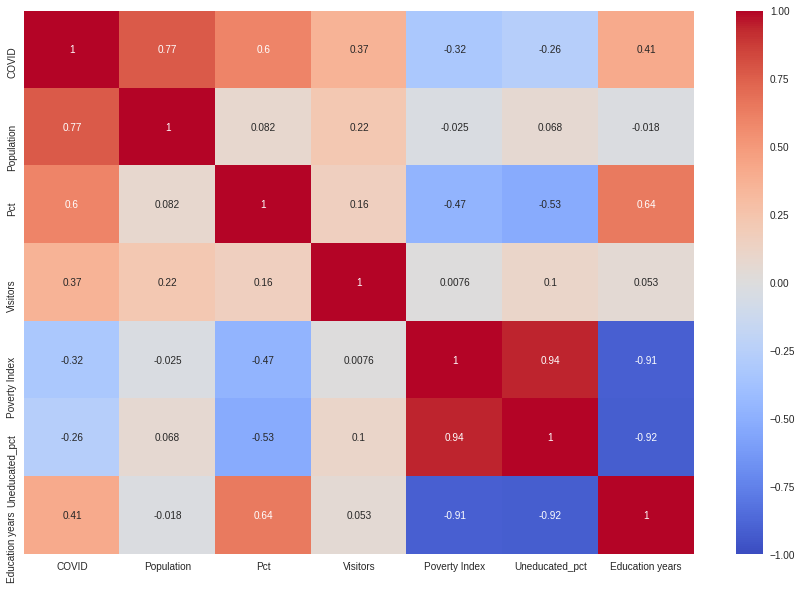

In [17]:
ax1 = plt.figure(figsize=(15,10))
ax1 = sns.heatmap(df_final.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

[Text(0, 0.5, 'Per-capita COVID-19'),
 Text(0.5, 0, 'Scholarship'),
 Text(0.5, 1.0, 'Correlation between Scholarship and COVID')]

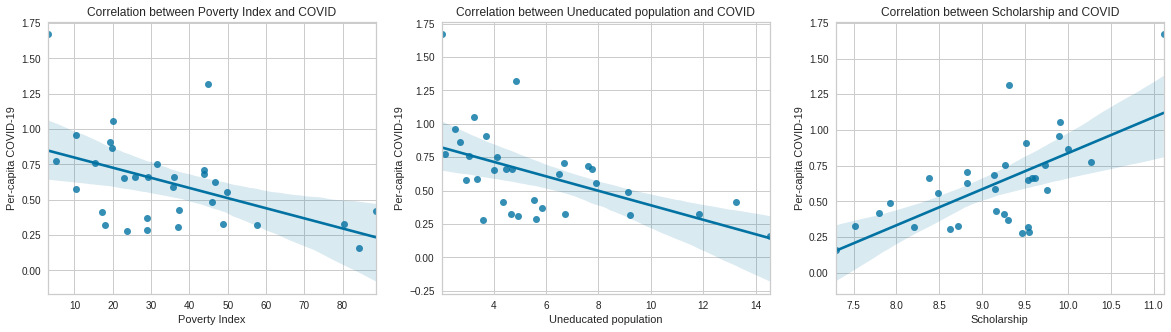

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
pct = sns.regplot(x='Poverty Index', y='Pct', data=df_final, ax = axs[0])
pct1 = sns.regplot(x='Uneducated_pct', y='Pct', data=df_final, ax = axs[1])
pct2 = sns.regplot(x='Education years', y='Pct', data=df_final, ax = axs[2])
pct.set(xlabel='Poverty Index', ylabel='Per-capita COVID-19', title='Correlation between Poverty Index and COVID')
pct1.set(xlabel='Uneducated population', ylabel='Per-capita COVID-19', title='Correlation between Uneducated population and COVID')
pct2.set(xlabel='Scholarship', ylabel='Per-capita COVID-19', title='Correlation between Scholarship and COVID')

To see the relationship between these variables, I decided to explore these three in a multilinear regression and apply later an Ordinary least squares to evaluate the relationship between these variables and the COVID-19 per-capita data. 

In [19]:
x = df_final[['Pct', 'Population', 'Poverty Index', 'Uneducated_pct', 'Education years']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)
norm_df.columns = ['Pct', 'Population', 'Poverty Index', 'Uneducated_pct', 'Education years']

In [20]:
X = norm_df[['Population', 'Education years', 'Uneducated_pct', 'Poverty Index']]
y = norm_df['Pct']

mlinear = linear_model.LinearRegression()

In [21]:
mlinear.fit(X, y)

Intercept=mlinear.intercept_
Coefficients=mlinear.coef_
Intercept, Coefficients

(-0.4973943226590618,
 array([ 0.14416524,  1.18338476, -0.17258339,  0.68621229]))

In [22]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                    Pct   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              32.41
Date:                Sun, 26 Jul 2020   Prob (F-statistic):                    3.90e-10
Time:                        07:20:30   Log-Likelihood:                          13.955
No. Observations:                  32   AIC:                                     -19.91
Df Residuals:                      28   BIC:                                     -14.05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

The results of the Ordinary least squares showed that, in the cases of 'Education years', suggest that there is some relationship between them, but the data in this first exploration is not adequate to say so. With this exploration. Using these variables together seems the best case for looking at danger zones in Mexico city and do some strategy for malls, public markets or the public transportation system. 

# Applying the model to Mexico City <a name="sexp"></a>

After learning the importance of these variables in tracing COVID, now I'm going to apply what I learned in Mexico City. The official area of the city is 1,485 km2 (573 sq mi) and it's inhabited by 8,918,653 people, however the Metropolitan area of the city has twice the size and has more 12 million of people but it's officially out of the city government administration. 

In this phase we are going to use the SINAVE (National Epidemiological Surveillance System) database, that contains all the data from the patients on the city hospitals. This database contains a lot of information about them, but in this case we are going to use the District where they live, if it is a COVID confirmed case or is a suspected case because of its symptoms. 

The administration of the city is divided into 16 alcaldías, but we are going to name them in english 'Districts' just to establish the name of this political administration. Here is a table with their name and population, and a Map of their distribution, the database used for population is the INEGI one, with the inter census estimates for population info. 

In [23]:
#Getting SINAVE database

sinave = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/base-covid-sinave.csv')

#Database has some information from other states near Mexico City, we just need information from core districts

cdmx_gen = sinave[(sinave['municipio_residencia'] == 'GUSTAVO A. MADERO') | (sinave['municipio_residencia'] == 'TLALPAN') | (sinave['municipio_residencia'] == 'LA MAGDALENA CONTRERAS') \
                | (sinave['municipio_residencia'] == 'IZTACALCO') | (sinave['municipio_residencia'] == 'MILPA ALTA') | (sinave['municipio_residencia'] == 'ALVARO OBREGON') \
                 | (sinave['municipio_residencia'] == 'XOCHIMILCO') | (sinave['municipio_residencia'] == 'MIGUEL HIDALGO') | (sinave['municipio_residencia'] == 'TLAHUAC') \
                 | (sinave['municipio_residencia'] == 'IZTAPALAPA') | (sinave['municipio_residencia'] == 'BENITO JUAREZ') | (sinave['municipio_residencia'] == 'VENUSTIANO CARRANZA')\
                | (sinave['municipio_residencia'] == 'COYOACAN') | (sinave['municipio_residencia'] == 'CUAJIMALPA DE MORELOS') | (sinave['municipio_residencia'] == 'AZCAPOTZALCO') \
                | (sinave['municipio_residencia'] == 'CUAUHTEMOC')]

#Then we need just COVID cases, suspected and confirmed, databases has some influenza and even other Coronavirus cases. 

cdmx_gen = cdmx_gen[(cdmx_gen['resultado_definitivo'] == 'SARS-CoV-2') | (cdmx_gen['resultado_definitivo'] == 'SARS-CoV') | (cdmx_gen['resultado_definitivo'] == 'CORONA SARS') | \
                 (cdmx_gen['resultado_definitivo'] == 'NO SUBTIPIFICADO') |  (cdmx_gen['resultado_definitivo'].isnull())]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (84,87,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
#Getting INEGI database

cdmx_pop = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/01_poblacion_cdmx.csv', header=None)

#Separating information that we don't need

cdmx_pop = cdmx_pop[(cdmx_pop[1] !='Total') & (cdmx_pop[2]=='Total') & (cdmx_pop[3]=='Valor')]
cdmx_pop = cdmx_pop[[1, 4]]
cdmx_pop.reset_index(drop=True)

#Because of the ',' in the quantities, the column is read as 'object' by pandas, we need to remove the comma and change the values to integers

cdmx_pop[1] = cdmx_pop[1].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
cdmx_pop[4] = cdmx_pop[4].apply(lambda x: int(x.replace(",", "")))
cdmx_pop = cdmx_pop.sort_values(by=1)
cdmx_pop.columns = ['District', 'Population']
cdmx_pop = cdmx_pop.reset_index(drop=True)

In [25]:
!wget https://twk.com.mx/COVID-Pobreza%20IBM/limite-de-las-alcaldias.geojson
cdmx_district = r'limite-de-las-alcaldias.geojson'

# open the json file - json.load() methods returns a python dictionary
with open(cdmx_district) as cdmx_file:
    cdmx_json = json.load(cdmx_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file

cdmx_geo = []
for index in range(len(cdmx_json['features'])):
    cdmx_geo.append(cdmx_json['features'][index]['properties']['nomgeo'])

#Sorting the geojson file
    
cdmx_geo = sorted(cdmx_geo)

# We replace the names in the dataframe 

df_cdmx = pd.DataFrame()
df_cdmx['District'] = cdmx_geo
df_cdmx.sort_values(by='District', inplace=True)
df_cdmx['Population'] = cdmx_pop['Population']

locator = Nominatim(user_agent="apuleyo3")
location = locator.geocode("Coyoacán, Mexico City, Mexico")

--2020-07-26 07:20:36--  https://twk.com.mx/COVID-Pobreza%20IBM/limite-de-las-alcaldias.geojson
Resolving twk.com.mx (twk.com.mx)... 161.35.230.8
Connecting to twk.com.mx (twk.com.mx)|161.35.230.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611122 (597K) [application/octet-stream]
Saving to: ‘limite-de-las-alcaldias.geojson’

limite-de-las-alcal 100%[===================>] 596.80K  3.88MB/s    in 0.2s    

2020-07-26 07:20:36 (3.88 MB/s) - ‘limite-de-las-alcaldias.geojson’ saved [611122/611122]



### POPULATION PER DISTRICT MEXICO CITY

In [26]:
df_cdmx

District  Population
0             Azcapotzalco      400161
1            Benito Juárez      417416
2                 Coyoacán      608479
3    Cuajimalpa de Morelos      199224
4               Cuauhtémoc      532553
5        Gustavo A. Madero     1164477
6                Iztacalco      390348
7               Iztapalapa     1827868
8   La Magdalena Contreras      243886
9           Miguel Hidalgo      364439
10              Milpa Alta      137927
11                 Tlalpan      677104
12                 Tláhuac      361593
13     Venustiano Carranza      427263
14              Xochimilco      415933
15          Álvaro Obregón      749982

### MAP OF THE POPULATION PER DISTRICT MEXICO CITY

In [27]:
gen2 = folium.Figure(width=1600, height=400)
cdmx = folium.Map(location=[location.latitude, location.longitude], zoom_start=10, tiles='openstreetmap').add_to(gen2)
cdmx.choropleth(
    geo_data=cdmx_district,
    data=df_cdmx,
    columns=['District', 'Population'],
    key_on='feature.properties.nomgeo',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=1,
    legend_name='Population by District',
    smooth_factor=0)

gen2

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### COVID cases

As we saw in the Mexico exploration, COVID-19 total cases are more numerous in the most populated districts, however when compared with the population of the district, the picture we got is different.

In [28]:
casos = cdmx_gen['municipio_residencia'].value_counts()
casos = casos.to_frame()
casos = casos.reset_index(level=0)
casos['index'][2] = 'ÁLVARO OBREGON'
casos = casos.sort_values(by='index').reset_index(drop=True)
df_cdmx['COVID'] = casos['municipio_residencia']
df_cdmx['Pct'] = (df_cdmx['COVID']/df_cdmx['Population'])*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


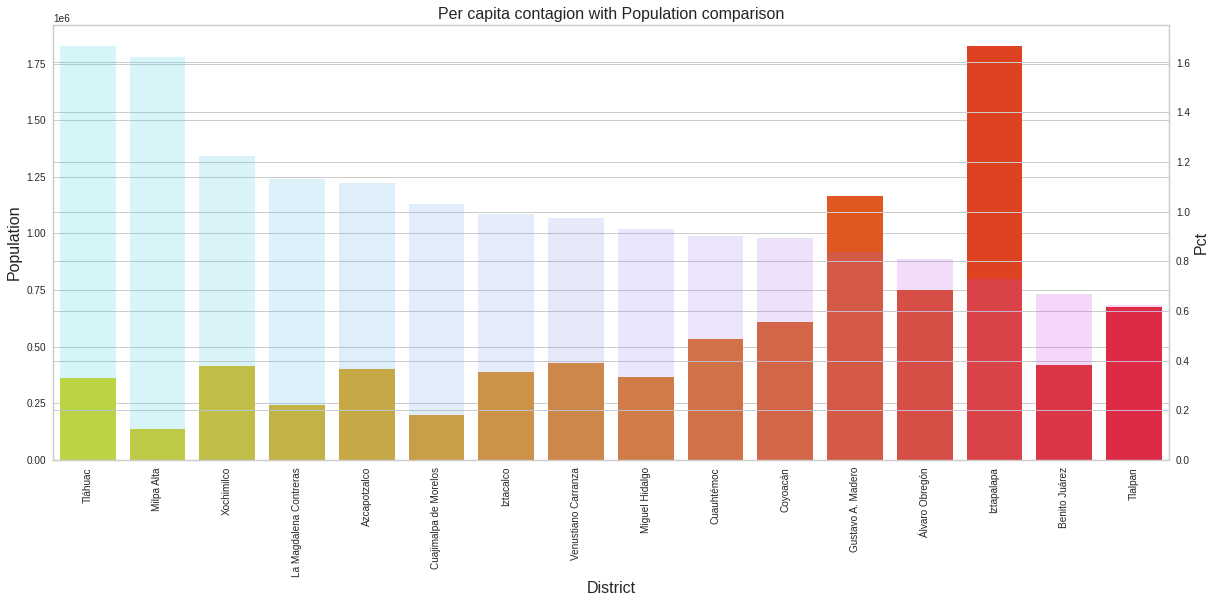

In [29]:
sorted_pct_cdmx = df_cdmx.sort_values(by='Pct', ascending=False)


fig, ax1 = plt.subplots(figsize=(20,8))
color = 'tab:green'

ax1.set_title('Per capita contagion with Population comparison', fontsize=16)
ax1.set_xlabel('District', fontsize=16)
ax1.set_ylabel('Millions of people', fontsize=16)
ax1 = sns.barplot(x='District', y='Population', data = sorted_pct_cdmx, palette='autumn_r', alpha=1)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:blue'


ax2.set_ylabel('Visitors', fontsize=16)
ax2 = sns.barplot(x='District', y='Pct', data = sorted_pct_cdmx, palette='cool', alpha=0.2)
ax2.tick_params(axis='y', color=color)

for p1,p2 in zip(ax1.get_xticklabels(), ax2.get_xticklabels()):
    p1.set_rotation(90)
    p2.set_rotation(90)

plt.show() 

As you can see, in Mexico City the most populated districts, Iztapalapa and Gustavo A. Madero, aren't the ones with the worst scenario in per capita order, those with the least population seem to be doing worse by far, but this could be related to the fact that those Districts are on the old rural Mexico City, the top three Tlahuac, Milpa Alta and Xochimilco are on the South East of the city, a mountainous and close to the inactive volcanoes.

Looking at this in the map it makes more sense, as you can see, this top tree per capita are together, La Magdalena Contreras is in the South West part of the city, but it is somehow related to the other Districts that is a mixed urban-rural area.

In [30]:
gen2 = folium.Figure(width=1600, height=400)
cdmx = folium.Map(location=[location.latitude, location.longitude], zoom_start=10, tiles='openstreetmap').add_to(gen2)
cdmx.choropleth(
    geo_data=cdmx_district,
    data=df_cdmx,
    columns=['District', 'Pct'],
    key_on='feature.properties.nomgeo',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=1,
    legend_name='Population by District',
    smooth_factor=0)

gen2

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Poverty Index and Education

Following the same path, I added the dataset information about Poverty Index, Education years and Uneducated percentage of adults, and after adding those, we are going to see if we can use the same variables to explain the per capita contagion, as we did in the Mexico exploration. 

In [31]:
cdmx_mun = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/Base_Indice_de_marginacion_municipal_90-15.csv', encoding='ISO-8859-1')
cdmx_mun = cdmx_mun[(cdmx_mun['ENT'] == 'Distrito Federal') & (cdmx_mun['AÑO'] == 2010)]
cdmx_mun = cdmx_mun[['MUN', 'IND0A100']].sort_values(by='MUN').reset_index(drop=True)
df_cdmx['Poverty Index'] = cdmx_mun['IND0A100'].astype(float)

education = pd.read_csv('https://twk.com.mx/COVID-Pobreza%20IBM/06_educacion_cdmx.csv', header=None)
education = education[(education[1] != 'Total') & (education[3] == 'Valor') & (education[2] == 'Total')]
education = education[[1, 5, 16]].reset_index(drop=True)
education[1] = education[1].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
education = education.sort_values(by=1).reset_index(drop=True)
df_cdmx['Education years'] = education[16].astype(float)
df_cdmx['Uneducated_pct'] = education[5].astype(float)
df_cdmx

District  Population  ...  Education years  Uneducated_pct
0             Azcapotzalco      400161  ...            11.18            2.00
1            Benito Juárez      417416  ...            13.81            0.72
2                 Coyoacán      608479  ...            12.25            1.45
3    Cuajimalpa de Morelos      199224  ...            11.37            2.28
4               Cuauhtémoc      532553  ...            11.97            1.28
5        Gustavo A. Madero     1164477  ...            10.70            2.29
6                Iztacalco      390348  ...            11.32            1.47
7               Iztapalapa     1827868  ...            10.21            2.52
8   La Magdalena Contreras      243886  ...            10.36            2.80
9           Miguel Hidalgo      364439  ...            12.95            0.90
10              Milpa Alta      137927  ...             9.37            3.39
11                 Tlalpan      677104  ...            11.22            2.28
12                 Tláhuac      361593  ...            10.15            2.41
13     Venustiano Carranza      427263  ...            11.13            1.30
14              Xochimilco      415933  ...            10.43            2.73
15          Álvaro Obregón      749982  ...            10.83            2.19

[16 rows x 7 columns]

Now that we have all the data, it seems the story is the same, even that correlation is not too strong, in the case of our variables against COVID per capita contagion, maybe after the Multilinear regression and the Ordinary squares we can see how correlated they are. 

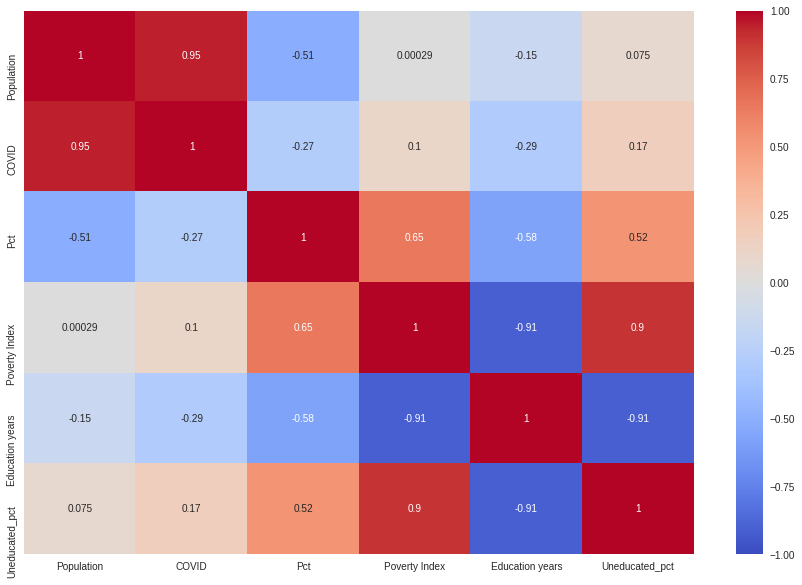

In [32]:
ax1 = plt.figure(figsize=(15,10))
ax1 = sns.heatmap(df_cdmx.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

[Text(0, 0.5, 'Per-capita COVID-19'),
 Text(0.5, 0, 'Scholarship'),
 Text(0.5, 1.0, 'Correlation between Scholarship and COVID')]

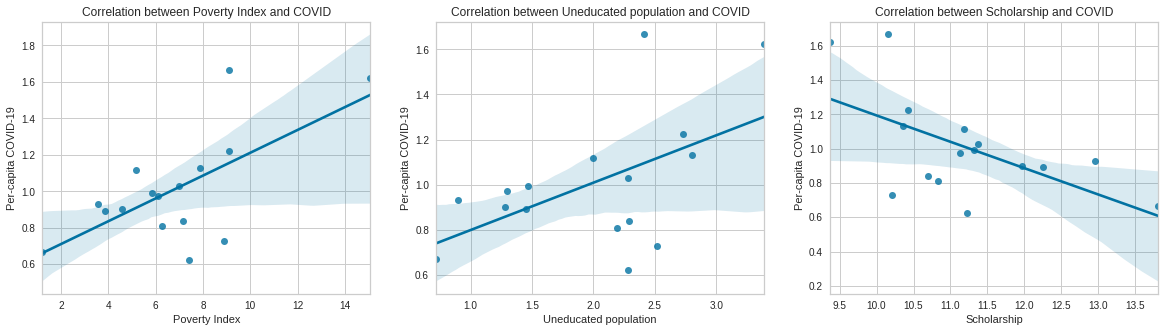

In [33]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
pct = sns.regplot(x='Poverty Index', y='Pct', data=df_cdmx, ax = axs[0])
pct1 = sns.regplot(x='Uneducated_pct', y='Pct', data=df_cdmx, ax = axs[1])
pct2 = sns.regplot(x='Education years', y='Pct', data=df_cdmx, ax = axs[2])
pct.set(xlabel='Poverty Index', ylabel='Per-capita COVID-19', title='Correlation between Poverty Index and COVID')
pct1.set(xlabel='Uneducated population', ylabel='Per-capita COVID-19', title='Correlation between Uneducated population and COVID')
pct2.set(xlabel='Scholarship', ylabel='Per-capita COVID-19', title='Correlation between Scholarship and COVID')

In [34]:
x = df_cdmx[['Pct', 'Population', 'Poverty Index', 'Uneducated_pct', 'Education years', 'COVID']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)
norm_df.columns = ['Pct', 'Population', 'Poverty Index', 'Uneducated_pct', 'Education years', 'COVID']

X = norm_df[['Population', 'Education years', 'Poverty Index']]
y = norm_df['Pct']

mlinear = linear_model.LinearRegression()
mlinear.fit(X, y)

Intercept=mlinear.intercept_
Coefficients=mlinear.coef_
Intercept, Coefficients
model = sm.OLS(y, X).fit()
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                    Pct   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              31.84
Date:                Sun, 26 Jul 2020   Prob (F-statistic):                    2.94e-06
Time:                        07:20:40   Log-Likelihood:                          6.6475
No. Observations:                  16   AIC:                                     -7.295
Df Residuals:                      13   BIC:                                     -4.977
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


After the OLS was applied, we can see that our Ajd. R-squared is really high and that our three main variables have low p-values and low standard error, it seems that Population, Education Years and Poverty Index explain somehow the per-capita contagion within the Mexico City regions. 
 

After doing this model I will apply a KMeans to classify the similarity based on the predictors and the Percentage of contagion, this for later assign this classification on some business and see if we can assess the risk if anyone visit those places or if Mexico City government open them based only in economical reasons. 

First we are going to see the best number of cluster to look for with an Elbow test

# Final clusters <a name="clusters"></a>

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fab2d386c18>,
                 k=None, metric=None, model=None, timings=True)

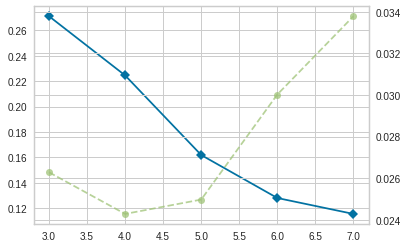

In [35]:
kclusters = 4

kmnorm = norm_df[['Pct', 'Poverty Index', 'Education years', 'Population']]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,8))

visualizer.fit(kmnorm)

In [36]:
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kmnorm)
kmeans.labels_[0:10] 
df_cdmx['Cluster'] = kmeans.labels_

In [37]:
gen = folium.Figure(width=1600, height=600)
mexmap = folium.Map(location=[location.latitude, location.longitude], zoom_start=10, tiles='openstreetmap').add_to(gen)
mexmap.choropleth(
    geo_data=cdmx_district,
    data=df_cdmx,
    columns=['District', 'Cluster'],
    key_on='feature.properties.nomgeo',
    fill_color='Set2', 
    fill_opacity=0.8, 
    line_opacity=1,
    legend_name='Clustering Districts',
    smooth_factor=0)

gen

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### HIGH RISK Cluster

In [38]:
df_cdmx[df_cdmx['Cluster'] == 0]

District  Population  COVID  ...  Education years  Uneducated_pct  Cluster
10  Milpa Alta      137927   2238  ...             9.37            3.39        0
12     Tláhuac      361593   6027  ...            10.15            2.41        0

[2 rows x 8 columns]

In [39]:
np.round(np.mean(df_cdmx[df_cdmx['Cluster'] == 0]['Pct']), 2)

1.64

### MEDIUM HIGH RISK Cluster

In [40]:
df_cdmx[df_cdmx['Cluster'] == 1]

District  Population  ...  Uneducated_pct  Cluster
0             Azcapotzalco      400161  ...            2.00        1
3    Cuajimalpa de Morelos      199224  ...            2.28        1
6                Iztacalco      390348  ...            1.47        1
8   La Magdalena Contreras      243886  ...            2.80        1
13     Venustiano Carranza      427263  ...            1.30        1
14              Xochimilco      415933  ...            2.73        1

[6 rows x 8 columns]

In [41]:
np.round(np.mean(df_cdmx[df_cdmx['Cluster'] == 1]['Pct']), 2)

1.08

### LOW RISK Cluster

In [42]:
df_cdmx[df_cdmx['Cluster'] == 2]

District  Population  ...  Uneducated_pct  Cluster
5   Gustavo A. Madero     1164477  ...            2.29        2
7          Iztapalapa     1827868  ...            2.52        2
11            Tlalpan      677104  ...            2.28        2
15     Álvaro Obregón      749982  ...            2.19        2

[4 rows x 8 columns]

In [43]:
np.round(np.mean(df_cdmx[df_cdmx['Cluster'] == 2]['Pct']), 2)

0.75

### MEDIUM LOW RISK Cluster

In [44]:
df_cdmx[df_cdmx['Cluster'] == 3]

District  Population  COVID  ...  Education years  Uneducated_pct  Cluster
1   Benito Juárez      417416   2789  ...            13.81            0.72        3
2        Coyoacán      608479   5431  ...            12.25            1.45        3
4      Cuauhtémoc      532553   4801  ...            11.97            1.28        3
9  Miguel Hidalgo      364439   3388  ...            12.95            0.90        3

[4 rows x 8 columns]

In [45]:
np.round(np.mean(df_cdmx[df_cdmx['Cluster'] == 3]['Pct']), 2)

0.85

In [53]:
risk = ['High', 'Medium High', 'Low', 'Medium Low']
df_cdmx['Risk'] = df_cdmx['Cluster'].apply(lambda x: risk[x])

### Tracing risk sites on Mexico City

Now that we have our model and our clusters to define the distances between the
different clusters we can classify the sites on their risk as stated by the <a href="https://www.texmed.org/uploadedFiles/Current/2016_Public_Health/Infectious_Diseases/309193%20Risk%20Assessment%20Chart%20V2_FINAL.pdf" >Texas Medical association</a>, we can search for them and build a map and classify them on it's geographical coordinates

We are going to use the FOURSQUARE API to find this places around the districts in the city, and to put the in a color that identifies the risk they are if close or not to a High COVID per capita region, then we are going to see those that are more common and put them into a Map that people can see. 

In [47]:
CLIENT_ID = 'G1WYTHPBHM5CGJOU3TDHBMSMSK3J3X3QHLI00OA4Z325DAF5' #Foursquare ID
CLIENT_SECRET = 'QB55AIJ1HBM3XYSTAFEMWUTS5RL3MQG4NYBJYUOJ12E3HCP3' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

lat = []
lng = []
for x in df_cdmx['District']:
    n = x + ' , Mexico City, Mexico'
    loc = locator.geocode(n)
    lat.append(loc.latitude)
    lng.append(loc.longitude)
print(lat, lng)
df_cdmx['latitude'] = lat
df_cdmx['longitude'] = lng

label_cdmx = df_cdmx[['District', 'Cluster']]

[19.4858148, 19.3804695, 19.32804005, 19.3187067, 19.4416128, 19.518545449999998, 19.39897535, 19.3428293, 19.27547005, 19.429614049999998, 19.138028, 19.200877, 19.26950425, 19.432396, 19.23697845, 19.318148049999998] [-99.18420573027606, -99.1632429340113, -99.15106340693589, -99.32320297716439, -99.1518637, -99.1436399464875, -99.09531197032297, -99.04689193846701, -99.26333858358939, -99.19863845640572, -99.05892017210884, -99.21701240427146, -99.00409684032508, -99.08806284470657, -99.0823001406525, -99.2778443631872]


In [48]:
def getNearbyVenues(names, latitudes, longitudes, qr, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id=' + CLIENT_ID + '&client_secret=' + CLIENT_SECRET + '&v=20180605&ll=' + \
        str(lat) +',' + str(lng) + '&radius='+ str(radius) + '&limit=100&categoryId=' + qr
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)
    

Based on what we have learned from other countries, we included transport, shopping malls (stores), nightlife (bars), gyms, barber shops and entertainment venues on the search query, and then merged them on a new dataframe for a left join with the labels from the main dataframe. 

In [49]:
transport = getNearbyVenues(names=df_cdmx['District'], latitudes=df_cdmx['latitude'],longitudes=df_cdmx['longitude'], qr='4d4b7105d754a06379d81259')
stores = getNearbyVenues(names=df_cdmx['District'], latitudes=df_cdmx['latitude'],longitudes=df_cdmx['longitude'], qr='4bf58dd8d48988d1fd941735')
nightlife = getNearbyVenues(names=df_cdmx['District'], latitudes=df_cdmx['latitude'],longitudes=df_cdmx['longitude'], qr='4d4b7105d754a06376d81259')
gym = getNearbyVenues(names=df_cdmx['District'], latitudes=df_cdmx['latitude'],longitudes=df_cdmx['longitude'], qr='4bf58dd8d48988d175941735')
barber = getNearbyVenues(names=df_cdmx['District'], latitudes=df_cdmx['latitude'],longitudes=df_cdmx['longitude'], qr='4bf58dd8d48988d110951735')
arts = getNearbyVenues(names=df_cdmx['District'], latitudes=df_cdmx['latitude'],longitudes=df_cdmx['longitude'], qr='4d4b7104d754a06370d81259')

transport.rename(columns={'Neighborhood' : 'District'}, inplace=True)
transport = transport.merge(label_cdmx, on='District', how='left')

stores.rename(columns={'Neighborhood' : 'District'}, inplace=True)
stores = stores.merge(label_cdmx, on='District', how='left')

nightlife.rename(columns={'Neighborhood' : 'District'}, inplace=True)
nightlife = nightlife.merge(label_cdmx, on='District', how='left')

gym.rename(columns={'Neighborhood' : 'District'}, inplace=True)
gym = gym.merge(label_cdmx, on='District', how='left')

barber.rename(columns={'Neighborhood' : 'District'}, inplace=True)
barber = barber.merge(label_cdmx, on='District', how='left')

arts.rename(columns={'Neighborhood' : 'District'}, inplace=True)
arts = arts.merge(label_cdmx, on='District', how='left')

grand_df = pd.DataFrame()
grand_df = grand_df.append(transport)
grand_df = grand_df.append(stores)
grand_df = grand_df.append(nightlife)
grand_df = grand_df.append(gym)
grand_df = grand_df.append(barber)
grand_df.shape

(2777, 8)

From the final result I selected the 30 most common sites, the most common by far is Salon/Barbershop, and it's not a surprise at all, in Mexico City you can see this kind of venue almost on every two blocks, it's more unlikely that you don't see any of them. Shopping malls, Gyms and Bars are more common in the central districts, but they can be found in the surroundings, not in big numbers, but it's not uncommon.

In [50]:
common = grand_df['Venue Category'].value_counts().head(30)
common

Salon / Barbershop          488
Shopping Mall               291
Gym                         261
Gym / Fitness Center        257
Bar                         209
Hotel                       154
Bus Station                  93
Brewery                      85
Metro Station                65
Bike Rental / Bike Share     63
Lounge                       51
Bus Stop                     44
Beer Garden                  43
Gymnastics Gym               34
Nightclub                    33
Gastropub                    30
Martial Arts Dojo            30
Yoga Studio                  28
Pub                          25
Airport Lounge               24
Speakeasy                    22
Airport Terminal             20
Cocktail Bar                 18
Beer Bar                     18
Intersection                 18
Airport Service              18
Rental Car Location          16
Karaoke Bar                  15
Bed & Breakfast              14
Motel                        14
Name: Venue Category, dtype: int64

In [51]:
common = list(common.index)
min_df = grand_df[grand_df['Venue Category'].isin(common)]

Now we can see the venues on color code based on the area they are located and the cluster that they belong to, sometimes it can overlap with other regions, but it can be because of their closeness with the next district. As you can see, central districs have more places than the districts in the outskirts with the exception of Miguel Hidalgo and Atzcapotzalco, those districts have a strong connection with municipalities on the neighbor state. 

In [52]:
gen = folium.Figure(width=1600, height=600)
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=11).add_to(gen)
map_clusters.choropleth(
    geo_data=cdmx_district,
    data=df_cdmx,
    columns=['District', 'Cluster'],
    key_on='feature.properties.nomgeo',
    fill_color='Set2', 
    fill_opacity=0.3, 
    line_opacity=0.3,
    legend_name='Clustering Districts',
    smooth_factor=0)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster, cat in zip(min_df['Venue Latitude'], min_df['Venue Longitude'], min_df['District'], min_df['Cluster'], min_df['Venue Category']):
    label = folium.Popup(str(cat) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# FINAL WORD <a name="final"></a>

# Results

We found that those regions, in Mexico and Mexico city, that has Low scholarship, high poverty index and a medium to high population, have some relationship with a high per capita contagion rate, in some cases population can be another important variable, that was in the case of the nationwide exploration, were Mexico City has a considerable population size and a high per capita contagion. Surprisingly, when analyzing the data of Mexico City, population it's not that important to trace COVID-19 rather than Poverty Index or Education years, and the variable of Uneducated adult percentage of population, is too low to have an impact on the results.

The KMeans clustering resulted surprisingly accurately in the classification of the risk value, considering the values we gave, those districts that were close to others with medium to high contagion were classified as medium and not low. Those that resulted classified as a low risk were those that were not in high per capita contagion rate and with a medium scholarly and, even if we did not include the variable in the exploration, are those that have a better rate of hospitals per capita in the city.

# Discussion

Is COVID-19 related to poverty and low education? well, following the principle of correlation is not causation, it's most likely that we are tracing another phenomenon that is below the hood. In the first days of the pandemic in Mexico, government spread the idea that COVID was not more severe that a common cold, as the contagion progressed and more people were sick, or death, those with less information and resources were hitted (and are still hitted) hard by the pandemic, and maybe is related to other variables like type of work and if the sick person has access to a hospital.

Another variable to take into account, is that a lot of the people of the high per capita contagion, work on the street selling things or as factory workers, this kind of work had any possibility since the beginning to attend the lockdown, and unfortunately, the government didn't enact any action to help them in any case, and to make it worse, people with low scholarship has been related to deny the existence of the virus in the first place, and for obvious reason, to unheard the recommendations of the authorities.


### Recommendations

<ul>
    <li>This first exploration can be pushed further if we have information on blocks, postal codes or neighborhoods, if we can cluster blocks with this information, it could be possible to give a better classification and prediction.</li>
    <li>I used euclidean distance to assess the similarity or distance between clusters, maybe applying the Haversine formula to give a better understanding of the spatial distance between venues, including the variables that we used in the simple k means.</li>
    <li>Maybe look for other variables, like workplace or type of work, unfortunately mexican government has no public dataset of the informal workers around the city, but maybe on the census, that is going to happen next year, we can trace them with other info.</li>
    <li>Visitors database was outdated, and it's not accurate about the movements of people around the country in 2020, this because pandemic disrupted tourism around the world, and Mexico it's not the exception. </li>
    <li>An exploration between Municipality across the country could be a final element to determine if the model and classification could be used to build a more robust model. </li>
</ul>

# Conclusion

Tracing COVID and looking for the variables available out there to help the people to understand the problem for their own safety or even help the government or corporations to build strategies to return to the most 'normal' operations, based on information, and not in perception or misconceptions.

Can my model be used in other regions?I think it can but maybe only in those societies that are similar to Mexico, on the other hand, I think low scholarship can be used to trace those that are disobedient with the authorities and enact different policies that can contain these people. In my case, working with Mexico city, is more evident that the group that needs more help, information and constant surveillance, is the one with the least resources to fight against the virus.
